cd /mnt/c/Users/mksch/Desktop/Personal/GitHub/basegis
docker run -p 8888:8888 -p 8787:8787 -v $(pwd):/home/gisuser/code/ -it basegis

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
print(os.getcwd())             # Shows current working directory

/home/gisuser/code


In [31]:
print(os.listdir('/home/gisuser/code/data'))     # Lists files in /data, adjust path accordingly

['combined_interval', 'combined_rc_interval', 'combined_rc_timeseries', 'combined_timeseries', 'img_diff', 'mw_area', 'mw_edge', 'mw_pn', 'old_remap_new_combine', 'remap_interval', 'remap_timeseries', 'trend', 'typology_TimeInterval.xlsx']


In [4]:
#Load your data from Excel
# Replace 'your_file.xlsx' with the actual filename
# Replace 'Time_Segment' with the actual column name that contains "TS", "90-95", etc.
# orginal data: '/home/gisuser/code/code/data/typology_grapgh_data.xlsx'
df = pd.read_excel('/home/gisuser/code/data/typology_TimeInterval.xlsx', index_col=0)
# if 'TS_km2' in df.columns:
#     df = df.drop(columns=['TS_km2'])

In [5]:
print(df)
#print(df.index.tolist())


                      90-95_km2  95-00_km2  00-05_km2  05-10_km2  10-15_km2  \
Typology                                                                      
Attrition                101952     101596      92443      80002      80253   
Aggregation               62018      63668      69588      72657      70836   
Shrinkage                 82898      81503      83194      79629      79416   
Perforation               21525      20946      21429      22661      24823   
Deformation                4178       4351       4704       4853       4957   
Persistent                63161      64870      67961      72865      68919   
Enlargement              113229     122636     133823     147226     146886   
Dissection                59153      57373      57137      57032      64733   
Fragmentation per se       1616       1641       1827       1952       2110   
Creation                  87525      90544     106143     125385     135002   

                      15-20_km2  
Typology         

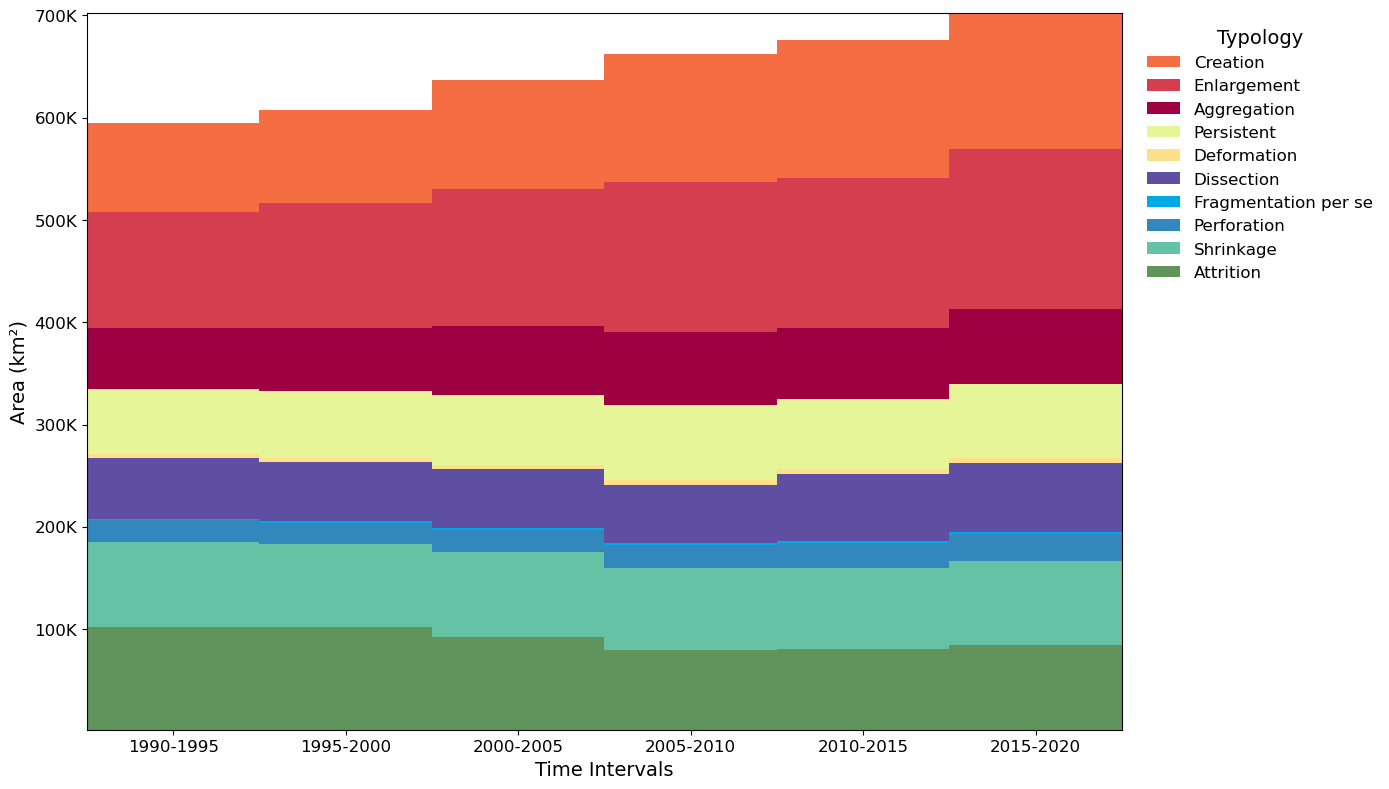

In [34]:
colors = {
    "Aggregation": "#9E0142",
    "Attrition": "#61945A",
    "Creation": "#F46D43",
    "Dissection": "#5E4FA2",
    "Fragmentation per se": "#00A9E6",
    "Shrinkage": "#66C2A5",
    "Perforation": "#3288BD",
    "Enlargement": "#D53E4F",
    #"shift": "#E6F598",
    "Persistent": "#E6F598",
    "Deformation": "#FEE08B"
}

# legend_labels = {
#     "Aggregation": "Aggregation",
#     "Attrition": "Attrition",
#     "Creation": "Creation",
#     "Dissection": "Dissection",
#     "Fragmentation per se": "Fragmentation per se",
#     "Shrinkage": "Shrinkage",
#     "Perforation": "Perforation",
#     "Enlargement": "Enlargement",
#     "Persistent": "Shift",
#     "Deformation": "Deformation"
# }

typology_order = [
    "Attrition", "Shrinkage", "Perforation", "Fragmentation per se", "Dissection",
    "Deformation", "Persistent", 
    "Aggregation", "Enlargement", "Creation", 
    
]

time_points = df.columns.tolist()

custom_x_labels = [
    "1990-1995", "1995-2000", "2000-2005",
    "2005-2010", "2010-2015", "2015-2020"
]

fig, ax = plt.subplots(figsize=(14, 8))

bottom = [0] * len(time_points)
for typ in typology_order:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(
            range(len(time_points)),
            data,
            bottom=bottom,
            color=colors.get(typ, "#cccccc"),
            edgecolor='none',
            width=1.0,
            #label=legend_labels.get(typ, typ)
            label=typ
        )
        bottom = [bottom[i] + data.iloc[i] for i in range(len(data))]

ax.set_xlabel('Time Intervals', fontsize=14)
ax.set_ylabel('Area (km²)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(df.values.min(), df.sum().max())
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))
#ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
ax.margins(x=0)
# Create legend in typology_order



ax.legend(title='Typology', bbox_to_anchor=(1.01, 1), loc='upper left', reverse=True, frameon=False, fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


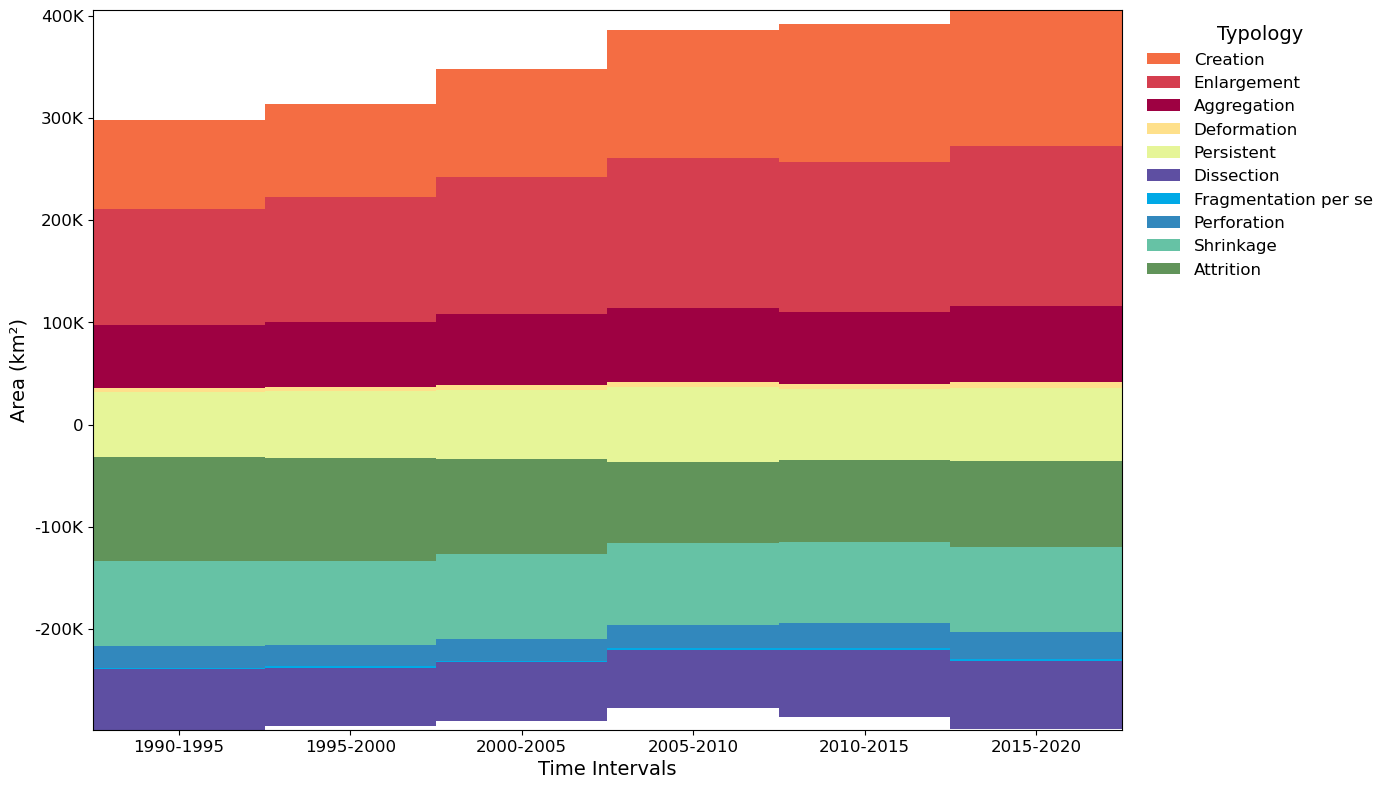

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

colors = {
    "Aggregation": "#9E0142",
    "Attrition": "#61945A",
    "Creation": "#F46D43",
    "Dissection": "#5E4FA2",
    "Fragmentation per se": "#00A9E6",
    "Shrinkage": "#66C2A5",
    "Perforation": "#3288BD",
    "Enlargement": "#D53E4F",
    #"shift": "#E6F598",
    "Persistent": "#E6F598",
    "Deformation": "#FEE08B"
}

custom_x_labels = [
    "1990-1995", "1995-2000", "2000-2005",
    "2005-2010", "2010-2015", "2015-2020"
]

# Define typology groups
baseline_typology = "Persistent"
decreasing = ["Attrition", "Shrinkage", "Perforation", "Fragmentation per se", "Dissection"]
increasing = ["Deformation","Aggregation", "Enlargement", "Creation"]

time_points = df.columns.tolist()

fig, ax = plt.subplots(figsize=(14, 8))

persistent_data = df.loc[baseline_typology]
half_persistent = persistent_data / 2

persistent_color = colors.get(baseline_typology, "#E6F598")

# Plot lower half Persistent below zero (no legend label to avoid duplication)
ax.bar(range(len(time_points)), -half_persistent, color=persistent_color, width=1.0, label='_nolegend_')

# Plot decreasing typologies stacked below the lower half baseline
bottom_neg = (-half_persistent).tolist()
for typ in decreasing:
    if typ in df.index:
        data = df.loc[typ] * -1  # Negate to plot below zero
        ax.bar(range(len(time_points)), data, bottom=bottom_neg, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)
        bottom_neg = [bottom_neg[i] + data.iloc[i] for i in range(len(data))]

# Plot upper half Persistent above zero (with legend label)
ax.bar(range(len(time_points)), half_persistent, color=persistent_color, width=1.0, label=baseline_typology)

# Plot increasing typologies stacked above upper half
bottom_pos = half_persistent.tolist()
for typ in increasing:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(range(len(time_points)), data, bottom=bottom_pos, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)
        bottom_pos = [bottom_pos[i] + data.iloc[i] for i in range(len(data))]

# Customize axes and labels
ax.set_xlabel('Time Intervals', fontsize=14)
ax.set_ylabel('Area (km²)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(min(bottom_neg), max(bottom_pos))

# Custom y-axis formatter to show '0' instead of '0K'
def custom_formatter(x, pos):
    if x == 0:
        return "0"
    return f"{x/1000:.0f}K"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
ax.margins(x=0)

# Legend settings as before
ax.legend(title='Typology', bbox_to_anchor=(1.01, 1), loc='upper left', reverse=True, frameon=False, fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()


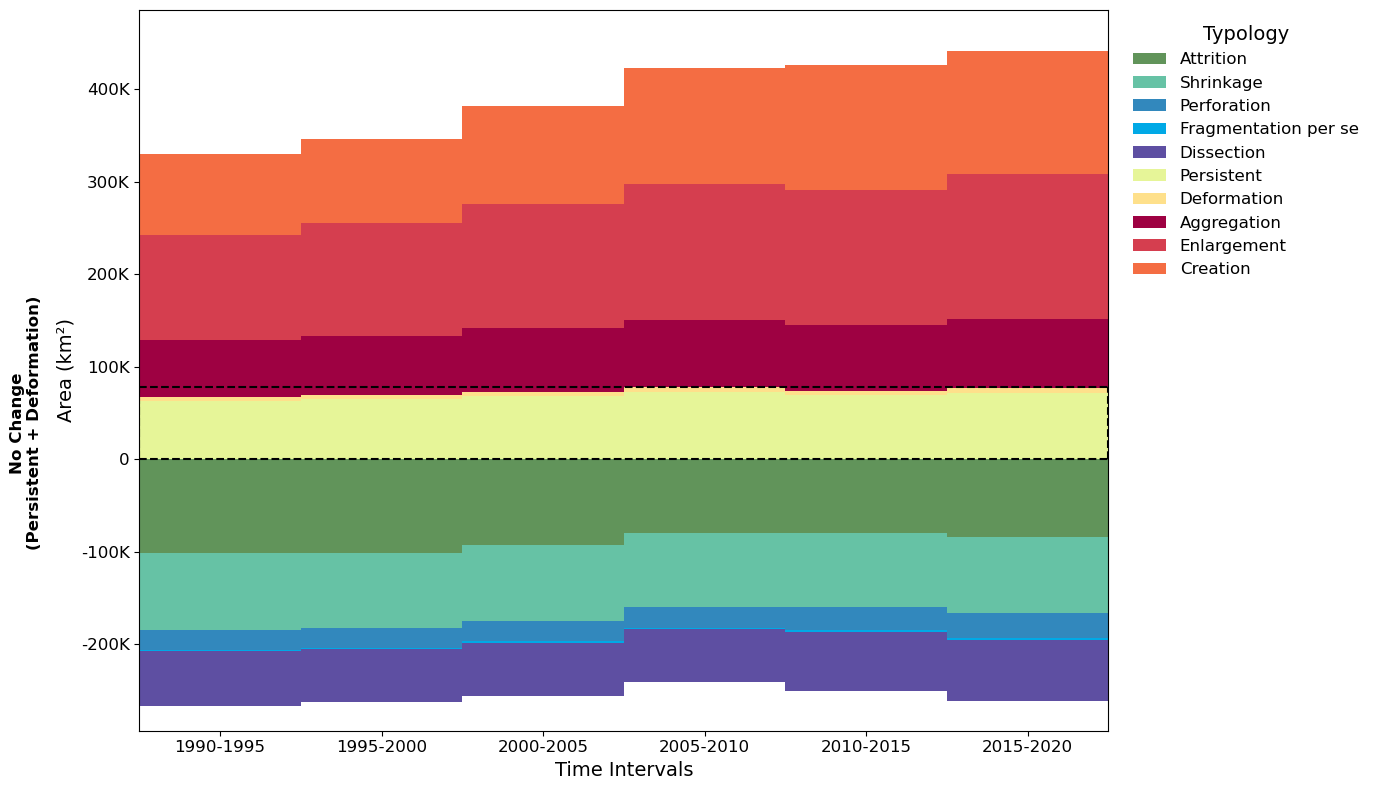

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches

colors = {
    "Aggregation": "#9E0142",
    "Attrition": "#61945A",
    "Creation": "#F46D43",
    "Dissection": "#5E4FA2",
    "Fragmentation per se": "#00A9E6",
    "Shrinkage": "#66C2A5",
    "Perforation": "#3288BD",
    "Enlargement": "#D53E4F",
    "Persistent": "#E6F598",
    "Deformation": "#FEE08B"
}

custom_x_labels = [
    "1990-1995", "1995-2000", "2000-2005",
    "2005-2010", "2010-2015", "2015-2020"
]

# Group definitions
baseline_typologies = ["Persistent", "Deformation"]
decreasing = ["Attrition", "Shrinkage", "Perforation", "Fragmentation per se", "Dissection"]
increasing = ["Aggregation", "Enlargement", "Creation"]

time_points = df.columns.tolist()

fig, ax = plt.subplots(figsize=(14, 8))

# Plot decreasing typologies stacked below zero (negative values)
bottom_neg = [0] * len(time_points)
for typ in decreasing:
    if typ in df.index:
        data = df.loc[typ] * -1  # negate to plot below zero
        ax.bar(range(len(time_points)), data, bottom=bottom_neg, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)
        bottom_neg = [bottom_neg[i] + data.iloc[i] for i in range(len(data))]

# Plot Persistent and Deformation stacked starting from zero (no change zone)
bottom_baseline = [0]  * len(time_points)
for typ in baseline_typologies:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(range(len(time_points)), data, bottom=bottom_baseline, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)
        bottom_baseline = [bottom_baseline[i] + data.iloc[i] for i in range(len(data))]

# Plot increasing typologies stacked above Persistent + Deformation
bottom_pos = bottom_baseline.copy()
for typ in increasing:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(range(len(time_points)), data, bottom=bottom_pos, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)
        bottom_pos = [bottom_pos[i] + data.iloc[i] for i in range(len(data))]

# Determine y positions for zero bracket (bottom and top of Persistent+Deformation combined)
zero_bracket_bottom = 0
zero_bracket_top = max(bottom_baseline)

# Draw dashed horizontal lines for zero bracket edges
ax.hlines(zero_bracket_bottom, xmin=-0.5, xmax=len(time_points)-0.5, colors='black', linestyles='dashed', linewidth=1.5)
ax.hlines(zero_bracket_top, xmin=-0.5, xmax=len(time_points)-0.5, colors='black', linestyles='dashed', linewidth=1.5)

# Draw vertical dashed brackets connecting these lines on the left side of the plot
ax.vlines(-0.5, zero_bracket_bottom, zero_bracket_top, colors='black', linestyles='dashed', linewidth=1.5)
ax.vlines(len(time_points)-0.5, zero_bracket_bottom, zero_bracket_top, colors='black', linestyles='dashed', linewidth=1.5)

# Optionally add a label for the no change bracket
ax.text(-1.2, (zero_bracket_bottom + zero_bracket_top)/2, 'No Change\n(Persistent + Deformation)', 
        rotation=90, va='center', ha='center', fontsize=12, weight='bold')

# Axis customization
ax.set_xlabel('Time Intervals', fontsize=14)
ax.set_ylabel('Area (km²)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

min_y = min(bottom_neg) * 1.1 if min(bottom_neg) < 0 else -0.1
max_y = max(bottom_pos) * 1.1
ax.set_ylim(min_y, max_y)

# Custom y-axis formatter
def custom_formatter(x, pos):
    if x == 0:
        return "0"
    return f"{x/1000:.0f}K"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
ax.margins(x=0)

# Legend
ax.legend(title='Typology', bbox_to_anchor=(1.01, 1), loc='upper left', frameon=False, fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()


/tmp/ipykernel_24/1089295750.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_x_labels[:len(time_points)], weight='bold')


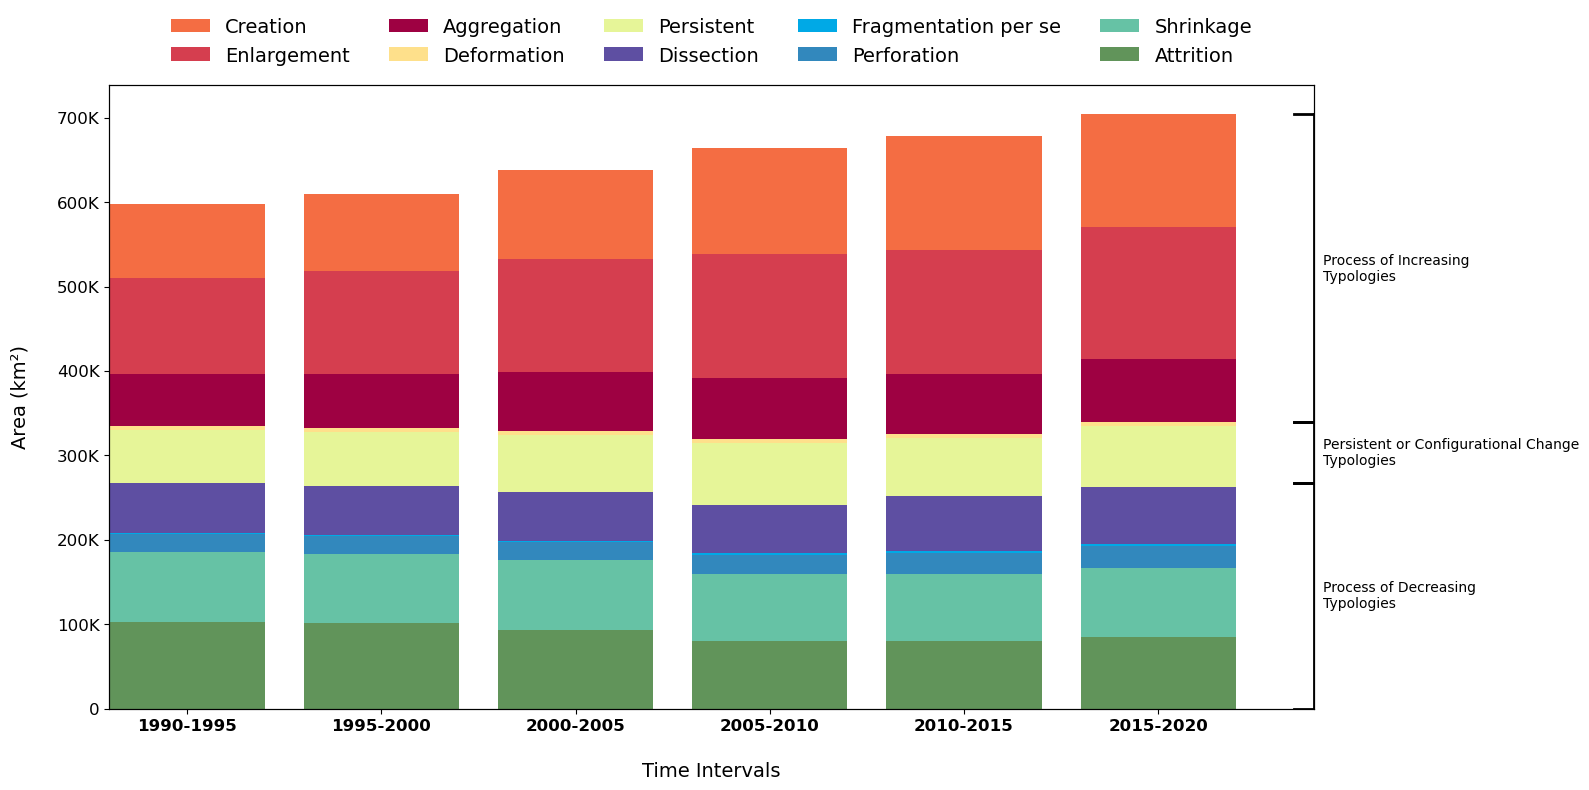

In [ ]:
df = pd.read_excel('/home/gisuser/code/data/typology_TimeInterval.xlsx', index_col=0)

colors = {
    "Aggregation": "#9E0142",
    "Attrition": "#61945A",
    "Creation": "#F46D43",
    "Dissection": "#5E4FA2",
    "Fragmentation per se": "#00A9E6",
    "Shrinkage": "#66C2A5",
    "Perforation": "#3288BD",
    "Enlargement": "#D53E4F",
    "Persistent": "#E6F598",
    "Deformation": "#FEE08B"
}

custom_x_labels = [
    "1990-1995", "1995-2000", "2000-2005",
    "2005-2010", "2010-2015", "2015-2020"
]

# Group definitions
no_change = ["Persistent", "Deformation"]
decreasing = ["Attrition", "Shrinkage", "Perforation", "Fragmentation per se", "Dissection"]
increasing = ["Aggregation", "Enlargement", "Creation"]

time_points = df.columns.tolist()
fig, ax = plt.subplots(figsize=(16, 8))

# Stack all typologies normally from 0 upward
bottom = [0] * len(time_points)
all_typologies = decreasing + no_change + increasing

for typ in all_typologies:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(range(len(time_points)), data, bottom=bottom, color=colors.get(typ, "#cccccc"), width=0.8, label=typ)
        bottom = [bottom[i] + data.iloc[i] for i in range(len(data))]

# Calculate bracket positions correctly
dec_bottom = 0
dec_top = sum(df.loc[typ] for typ in decreasing if typ in df.index)

no_change_bottom = dec_top
no_change_top = dec_top + sum(df.loc[typ] for typ in no_change if typ in df.index)

inc_bottom = no_change_top
inc_top = [bottom[i] for i in range(len(bottom))]

# Set y-axis limits
ax.set_ylim(0, max(bottom) * 1.05)

# Create secondary y-axis for brackets
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks([])

# Draw brackets on right side
x_pos = len(time_points) - 0.3

# Decreasing bracket
dec_mid = (dec_bottom + dec_top.max()) / 2
ax2.plot([x_pos, x_pos + 0.1], [dec_bottom, dec_bottom], 'k-', linewidth=2)
ax2.plot([x_pos, x_pos + 0.1], [dec_top.max(), dec_top.max()], 'k-', linewidth=2)
ax2.plot([x_pos + 0.1, x_pos + 0.1], [dec_bottom, dec_top.max()], 'k-', linewidth=2)
ax2.text(x_pos + 0.15, dec_mid, 'Process of Decreasing\nTypologies', rotation=0, va='center', ha='left')

# No change bracket
no_change_mid = (no_change_bottom.max() + no_change_top.max()) / 2
ax2.plot([x_pos, x_pos + 0.1], [no_change_bottom.max(), no_change_bottom.max()], 'k-', linewidth=2)
ax2.plot([x_pos, x_pos + 0.1], [no_change_top.max(), no_change_top.max()], 'k-', linewidth=2)
ax2.plot([x_pos + 0.1, x_pos + 0.1], [no_change_bottom.max(), no_change_top.max()], 'k-', linewidth=2)
ax2.text(x_pos + 0.15, no_change_mid, 'Persistent or Configurational Change\nTypologies', rotation=0, va='center', ha='left')

# Increasing bracket
inc_mid = (inc_bottom.max() + max(inc_top)) / 2
ax2.plot([x_pos, x_pos + 0.1], [inc_bottom.max(), inc_bottom.max()], 'k-', linewidth=2)
ax2.plot([x_pos, x_pos + 0.1], [max(inc_top), max(inc_top)], 'k-', linewidth=2)
ax2.plot([x_pos + 0.1, x_pos + 0.1], [inc_bottom.max(), max(inc_top)], 'k-', linewidth=2)
ax2.text(x_pos + 0.15, inc_mid, 'Process of Increasing\nTypologies', rotation=0, va='center', ha='left')

# Axis customization

# x axis 
ax.set_xlabel('Time Intervals', fontsize=14, labelpad=20)
ax.set_xticklabels(custom_x_labels[:len(time_points)], weight='bold')
# y axis
ax.set_ylabel('Area (km²)', fontsize=14, labelpad=20)
# graph settings
ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '0' if x == 0 else f'{x/1000:.0f}K'))
ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
#ax.tick_params(axis='x', which='major', labelsize=12, weight='bold')
ax.margins(x=0)
# font


# Legend
# right side legend
#ax.legend(title='Typology', bbox_to_anchor=(1.2, 1), loc='upper left', reverse=True, frameon=False, fontsize=14, title_fontsize=15)
# top legend
ax.legend(ncol=5, bbox_to_anchor=(0.5, 1.07), loc='center', reverse =True, frameon=False, fontsize=14, title_fontsize=15) # title='Typology'


plt.tight_layout()
plt.show()


/tmp/ipykernel_24/1140385656.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom = [bottom[i] + data[i] for i in range(len(data))]


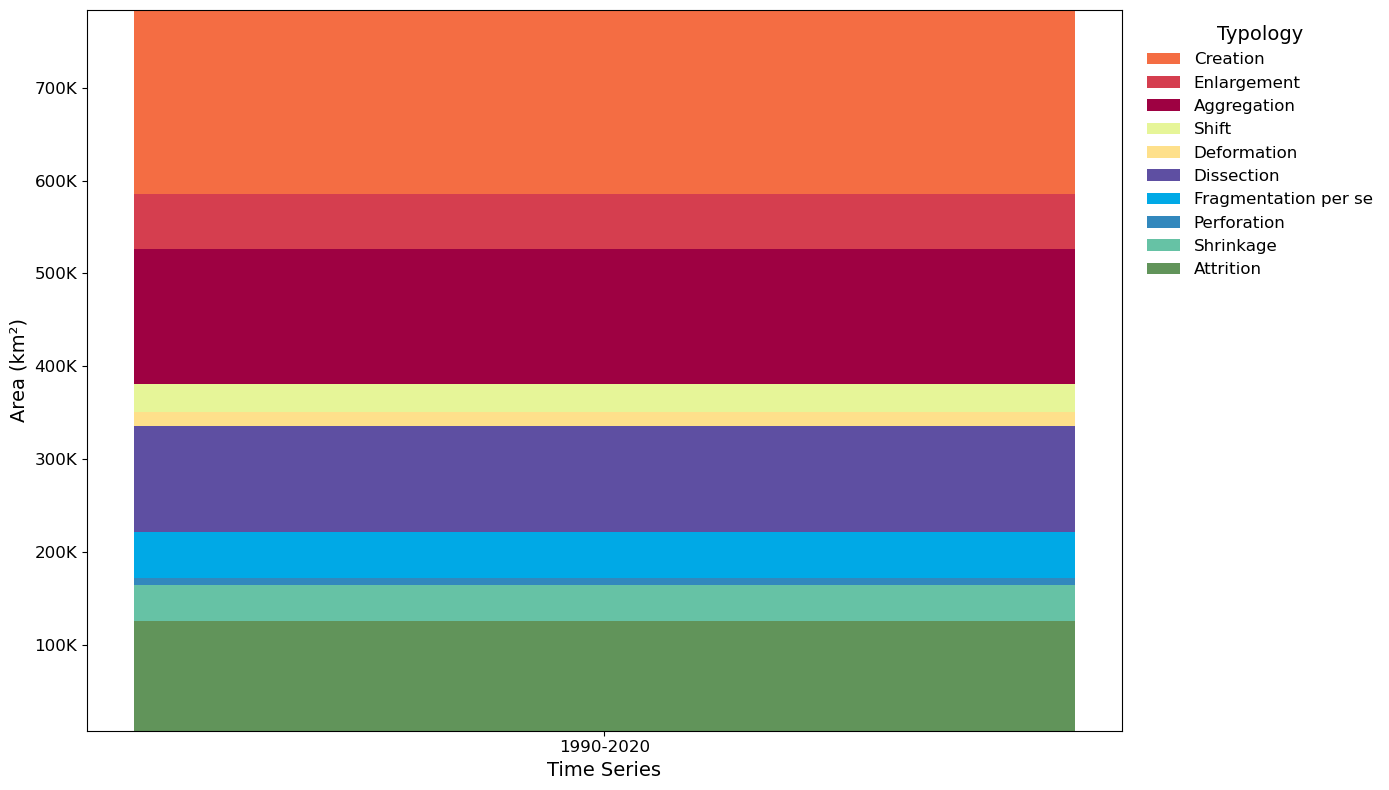

In [88]:
# time series 
df = pd.read_excel('/home/gisuser/code/code/data/typology_grapgh_data.xlsx', index_col=0)
if 'TS_km2' in df.columns:
    df = df[['TS_km2']]
    
colors = {
    "aggregation": "#9E0142",
    "attrition": "#61945A",
    "creation": "#F46D43",
    "dissection": "#5E4FA2",
    "frag per se": "#00A9E6",
    "shrinkage": "#66C2A5",
    "perforation": "#3288BD",
    "enlargement": "#D53E4F",
    "shift": "#E6F598",
    "deformation": "#FEE08B"
}

legend_labels = {
    "aggregation": "Aggregation",
    "attrition": "Attrition",
    "creation": "Creation",
    "dissection": "Dissection",
    "frag per se": "Fragmentation per se",
    "shrinkage": "Shrinkage",
    "perforation": "Perforation",
    "enlargement": "Enlargement",
    "shift": "Shift",
    "deformation": "Deformation"
}

typology_order = [
    "attrition", "shrinkage", "perforation", "frag per se", "dissection",
    "deformation", "shift", 
    "aggregation", "enlargement", "creation", 
    
]

time_points = df.columns.tolist()

custom_x_labels = [
    "1990-2020"
]

fig, ax = plt.subplots(figsize=(14, 8))

bottom = [0] * len(time_points)
for typ in typology_order:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(
            range(len(time_points)),
            data,
            bottom=bottom,
            color=colors.get(typ, "#cccccc"),
            edgecolor='none',
            width=1.0,
            label=legend_labels.get(typ, typ)
        )
        bottom = [bottom[i] + data[i] for i in range(len(data))]

ax.set_xlabel('Time Series', fontsize=14)
ax.set_ylabel('Area (km²)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(df.values.min(), df.sum().max())
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))
#ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
ax.margins(x=0.05, y=0.05)
# Create legend in typology_order



ax.legend(title='Typology', bbox_to_anchor=(1.01, 1), loc='upper left', reverse=True, frameon=False, fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


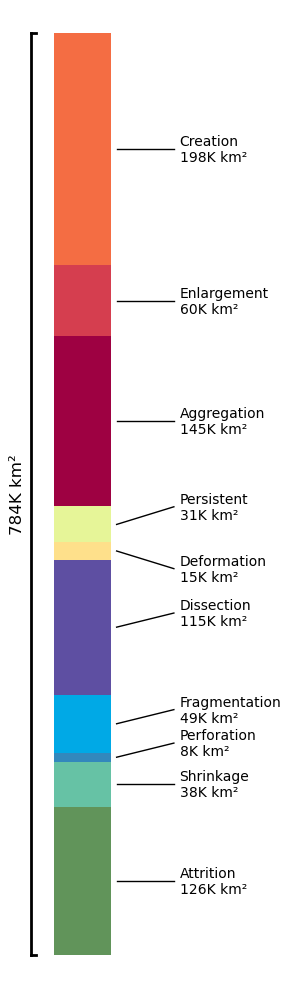

In [ ]:
# time series 
df = pd.read_excel('/home/gisuser/code/data/typology_TS.xlsx', index_col=0)
# Sum all columns to get total for each typology
df_total = df.sum(axis=1)

colors = {
    "Aggregation": "#9E0142",
    "Attrition": "#61945A",
    "Creation": "#F46D43",
    "Dissection": "#5E4FA2",
    "Fragmentation per se": "#00A9E6",
    "Shrinkage": "#66C2A5",
    "Perforation": "#3288BD",
    "Enlargement": "#D53E4F",
    "Persistent": "#E6F598",
    "Deformation": "#FEE08B"
}

typology_order = [
    "Attrition", "Shrinkage", "Perforation", "Fragmentation per se", "Dissection",
    "Deformation", "Persistent", 
    "Aggregation", "Enlargement", "Creation"
]

fig, ax = plt.subplots(figsize=(3, 10))

# Create single vertical bar
bottom = 0
for i, typ in enumerate(typology_order):
    if typ in df_total.index:
        value = df_total.loc[typ]
        ax.bar(0, value, bottom=bottom, color=colors.get(typ, "#cccccc"), width=0.5, label=typ)
        
        # Specific offsets for problematic labels
        mid_point = bottom + value/2
        if typ == "Deformation":
            offset = -15000 # this fixes the issue with overlap with persistent
        elif typ == "Persistent":
            offset = 15000
        elif i in [2, 3, 4]:  # Perforation, Fragmentation, Dissection
            offset = 12000 # fixes overlap issue for these typologies 
        else:
            offset = 0
        
        label_y = mid_point + offset
        
        # Add diagonal leader line
        ax.plot([0.3, 0.8], [mid_point, label_y], 'k-', linewidth=1)
        
        # Shorten long names for better display
        display_name = "Fragmentation" if typ == "Fragmentation per se" else typ
        ax.text(0.85, label_y, f'{display_name}\n{value/1000:.0f}K km²', va='center', ha='left', fontsize=10)
        
        bottom += value

# orignal code from amazon q with stnadard graph layout
#ax.set_xlim(-0.5, 2.5)
#ax.set_ylabel('Total Area (km²)', fontsize=12)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))
#ax.set_xticks([])
#ax.set_xlabel('1990-2020 Time Series', fontsize=12)

# Customized graph layout
df_total = df.sum(axis=1)
total_sum = df_total.sum()

ax.set_yticks([]) # removes tick marks on both axes
ax.plot([-0.45, -0.45], [0, total_sum], 'k-', linewidth=2)  # Vertical bracket line
ax.plot([-0.45, -0.4], [0, 0], 'k-', linewidth=2)  # Bottom bracket
ax.plot([-0.45, -0.4], [total_sum, total_sum], 'k-', linewidth=2)  # Top bracket
ax.text(-0.5, total_sum/2, f'{total_sum/1000:.0f}K km²', rotation=90, va='center', ha='right', fontsize=12) # bracket label
ax.xaxis.set_visible(False) # remove x axis line
ax.set_ylim(-20000, total_sum + 20000) # adds space bewlow x to prevent cutting off bottom brack (bc using the above line)

# remove box around graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.tight_layout()
plt.show()
